<img align = 'center' src="./Images/ML_SWE.jpg" alt = 'image' width = '1000'/>


# Model Training


This notebook exemplifies the Sierra Snow Model (SSM) (a derivation of the National Snow Model (NSM)) data processing (through the DataProcess.py script), and model training, predictions, and preliminary evaluation via the MLP_model.py script.
With the focus of GeoSMART Hack Week to advance machine learning modeling skill sets, the motivation of the SSM project is for participants to modify the MLP_model.py script.
Suggested modifications include optimizing the current multilayered-perceptron (MLP) neural network algorithm or selecting and optimizing a different ML algorithm (strongly encouraged).
We encourage advanced modelers to contact Dr. Ryan Johnson (rjohnson18@ua.edu) for ideas and methods to optimize the model framework, there are several concepts of interest including feature engineering, domain optimization, feature selection, etc.

The following workflow exemplifies the steps and python files to process the training data, train a model, produce predictions, and perform preliminary evaluations

In [2]:
%%time
import os
import DataProcess
import LinearReg_Model

/home/jovyan/envs/NSM_env/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-10-27 17:35:04.146169: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-27 17:35:04.187802: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-27 17:35:04.187838: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-27 17:35:04.187867: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS

CPU times: user 4.43 s, sys: 2.61 s, total: 7.04 s
Wall time: 35.8 s


In [3]:
#Set working directories
cwd = os.getcwd()
os.chdir("..")
os.chdir("..")
datapath = os.getcwd()  

## Model Training and Testing Schema

The motivation the project is to advance the SSM skill for extrapolating regional SWE dynamics from in-situ observations.
To develop and test the SSM, we will train the model on NASA Airborne Snow Observatory (ASO) and snow course observations spanning 2013-2018, and some of 2019.
Within this training dataset, model training will use a random 75-25\% train-test data split. 
The random sample function will be 1234 to ensure all participants models use the same training and testing data for this phase of model development - note, this will support an intermodel comparision.

Model validation will be on water year 2019 and use the [NWM_MLP_2019_Simulation]('./NWM_MLP_2019_Simulation.ipynb').
This historical simulation will function as a hindcast, and use the 2019 water year NASA ASO and snow course observations to determine model performance. 


Upon the completion of model training, model execution predicts 1-km resolution SWE from data up to the current date of observation provided Latitude, Longitude, corresponding topographic data, and neighboring observation input features. From the sampling of test features, Chapter [Evaluation]('./evaluation.ipynb') compares the modeled 1-km grid SWE values to the observed values.

In [4]:
#Define hold out year
HOY = 2019
#Run data processing script to partition key regional dataframes
#note, need to load RegionTrain_SCA.h5,
RegionTrain, RegionTest, RegionObs_Train, RegionObs_Test, RegionTest_notScaled = DataProcess.DataProcess(HOY, datapath, cwd)

Processing training dataframes for each region
N_Sierras
S_Sierras_Low
S_Sierras_High


## Train

In [6]:

from tensorflow.keras import activations


In [7]:
epochs= 100
learning_rate = 0.1
validation_split = 0.2
activation = activations.sigmoid
LinearReg_Model.Model_train(cwd,
                            epochs,
                            learning_rate,
                            validation_split,
                            activation,
                            RegionTrain,
                            RegionTest,
                            RegionObs_Train,
                            RegionObs_Test)

Training model for:  N_Sierras
All previous files deleted successfully.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 105)               211       
 on)                                                             
                                                                 
 dense (Dense)               (None, 1)                 106       
                                                                 
Total params: 317 (1.24 KB)
Trainable params: 106 (424.00 Byte)
Non-trainable params: 211 (848.00 Byte)
_________________________________________________________________
None
Training model for:  S_Sierras_Low
All previous files deleted successfully.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 6)   

## Predict

In [9]:
Predictions = LinearReg_Model.Model_predict(cwd,
                                            RegionTest,
                                            RegionObs_Test,
                                            RegionTest_notScaled)

18/18 [==============================] - 0s 890us/step


## Evaluate

Preliminary Model Analysis for:  N_Sierras
 R2 is  0.8830250318168892
 RMSE is  12.45877790994267
 R2 fSCA is  0.8628103211819695
 RMSE fSCA is  13.492415162004646


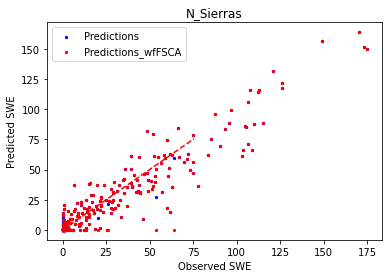

Preliminary Model Analysis for:  S_Sierras_Low
 R2 is  0.9609558788898862
 RMSE is  4.985875649544347
 R2 fSCA is  0.854690190492803
 RMSE fSCA is  9.618582710807603


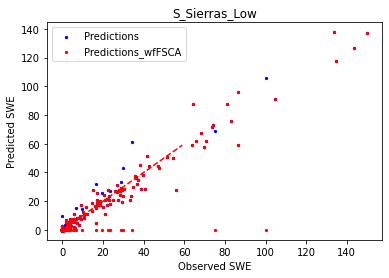

Preliminary Model Analysis for:  S_Sierras_High
 R2 is  0.9516968431587901
 RMSE is  10.30991406382092
 R2 fSCA is  0.9401917270770697
 RMSE fSCA is  11.472231936637328


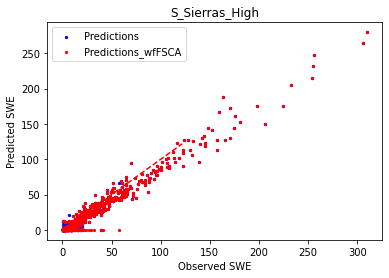

,Region,R2,RMSE,R2_fSCA,RMSE_fSCA
0,N_Sierras,0.88,12.46,0.86,13.49
1,S_Sierras_Low,0.96,4.99,0.85,9.62
2,S_Sierras_High,0.95,10.31,0.94,11.47


In [10]:
Performance = LinearReg_Model.Prelim_Eval(cwd,
                                          Predictions)
Performance

### Model Evaluation

Now that we have a trained model producing acceptable performance, it is time to more rigorously evaluate its performance using the [Standardized Snow Water Equivalent Tool](./SSWEET.py) within an interactive [evaluation notebook](./evaluation.ipynb).